In [1]:
# General Purpose
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import time


# Geocoding
#from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# Scraping
#from bs4 import BeautifulSoup
#import wikipedia as wp

# Some displaylibraries 
from IPython.display import Image 
from IPython.core.display import HTML 
    
# json file ---> pandas 
from pandas.io.json import json_normalize

# plotting libraries
import geopandas as gpd
from shapely.geometry import Point, MultiPoint, Polygon

import folium 

# Foursquare preliminaries
CLIENT_ID = 'TLVPS10MH51ZWU42GH500MWURHHCL5SBS2I5FBTCQCSQTOJX' # your Foursquare ID
CLIENT_SECRET = 'ZOF0JXHAHPB5SE0VZQQC0BXUSBBG3NBXBZ2WGKWLUF1RZYDF' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30

In [3]:
toronto_DF=pd.read_csv('~/Desktop/Projects/Coursera_Capstone/Tor_Codes.csv')
bike_df = pd.read_csv('/Users/richard/Downloads/toronto-bikeshare-data/bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q1 2018.csv')
bike_df1=pd.read_csv('/Users/richard/Downloads/toronto-bikeshare-data/bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q2 2018.csv')
bike_df2=pd.read_csv('/Users/richard/Downloads/toronto-bikeshare-data/bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q3 2018.csv')
bike_df3=pd.read_csv('/Users/richard/Downloads/toronto-bikeshare-data/bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q4 2018.csv')
bike= pd.concat([bike_df, bike_df1, bike_df2, bike_df3], axis=0)

In [63]:
bike.trip_start_time=pd.to_datetime(bike.trip_start_time)
bike.trip_stop_time=pd.to_datetime(bike.trip_stop_time)
bike['start_date'] = [d.date() for d in bike['trip_start_time']]
bike['start_time'] = [d.time() for d in bike['trip_start_time']]
bike['stop_date'] = [d.date() for d in bike['trip_stop_time']]
bike['stop_time'] = [d.time() for d in bike['trip_stop_time']]
del bike['trip_stop_time'] 
del bike['trip_start_time']

In [72]:
bike.head(2)


trip_duration_seconds           from_station_name  \
0                    393      Bremner Blvd / Rees St   
1                    625  Ossington Ave / College St   

                to_station_name      user_type  start_date start_time  \
0  Bathurst St / Fort York Blvd  Annual Member  2018-01-01   00:47:00   
1    Central Tech  (Harbord St)  Annual Member  2018-01-01   00:52:00   

    stop_date stop_time  
0  2018-01-01  00:54:00  
1  2018-01-01  01:03:00

In [73]:
coords=pd.read_csv('loc_meta.csv')
coords1=pd.read_csv('loc_meta.csv')
coords.rename(columns={'lats':'from_lats'}, inplace=True)
coords.rename(columns={'longs':'from_longs'}, inplace=True)
coords1.rename(columns={'lats':'to_lats'}, inplace=True)
coords1.rename(columns={'longs':'to_longs'}, inplace=True)
coords.rename(columns={'station_name':'from_station_name'}, inplace=True)
coords1.rename(columns={'station_name':'to_station_name'}, inplace=True)

In [89]:
ghu=pd.merge(coords,bike, how='left', left_on=['from_station_name'], right_on=['from_station_name'])

In [91]:
ghu.head(2)

from_station_name  from_lats  from_longs  trip_duration_seconds  \
0  Bremner Blvd / Rees St  43.640893  -79.387742                    393   
1  Bremner Blvd / Rees St  43.640893  -79.387742                   1004   

                              to_station_name      user_type  start_date  \
0                Bathurst St / Fort York Blvd  Annual Member  2018-01-01   
1  Sherbourne St / Carlton St (Allan Gardens)  Annual Member  2018-01-02   

  start_time   stop_date stop_time  
0   00:47:00  2018-01-01  00:54:00  
1   17:24:00  2018-01-02  17:41:00

In [92]:
ghu1.head(2)

to_station_name    to_lats   to_longs  trip_duration_seconds  \
0  Bremner Blvd / Rees St  43.640893 -79.387742                    139   
1  Bremner Blvd / Rees St  43.640893 -79.387742                    867   

                            from_station_name      user_type  start_date  \
0              Navy Wharf Ct. / Bremner Blvd.  Annual Member  2018-01-01   
1  Sherbourne St / Carlton St (Allan Gardens)  Annual Member  2018-01-02   

  start_time   stop_date stop_time  
0   13:41:00  2018-01-01  13:44:00  
1   08:46:00  2018-01-02  09:00:00

In [90]:
ghu1=pd.mghu=pd.merge(coords,bike, how='left', left_on=['from_station_name'], right_on=['from_station_name'])

In [9]:
#big_bike=pd.merge(ghu,ghu1)
big_bike=pd.read_csv('big_bike.csv')
del big_bike['Unnamed: 0']

In [10]:
big_bike.head(2)

from_station_name  from_lats  from_longs  trip_duration_seconds  \
0  Bremner Blvd / Rees St  43.640893  -79.387742                    393   
1  Bremner Blvd / Rees St  43.640893  -79.387742                   1004   

                              to_station_name      user_type  start_date  \
0                Bathurst St / Fort York Blvd  Annual Member  2018-01-01   
1  Sherbourne St / Carlton St (Allan Gardens)  Annual Member  2018-01-02   

  start_time   stop_date stop_time    to_lats   to_longs  
0   00:47:00  2018-01-01  00:54:00  43.638882 -79.400656  
1   17:24:00  2018-01-02  17:41:00  43.663193 -79.373055

In [19]:
import googlemaps
clientkey = ''
gmaps = googlemaps.Client(key = clientkey)

In [20]:
#Function to geocode the intersections 
def get_coordinates(address):
    city = 'Toronto, Ontario, Canada'
    geocode_result = gmaps.geocode(str(address) +' '+ city)
    if len(geocode_result) > 0:
        return list(geocode_result[0]['geometry']['location'].values())
    else:
        return [np.NaN, np.NaN]


In [27]:
lat_meta = []
long_meta = []
for i in goobers:
    coords = get_coordinates(i)
    lat_meta.append(coords[0])
    long_meta.append(coords[1])
lat_meta   

In [60]:
loc_meta = {'station_name':stations, 'lats':bike_lat, 'longs':bike_long}
loc_meta = pd.DataFrame(loc_meta)

In [2]:
TPS = gpd.read_file('/Users/richard/Downloads/TPS_Toronto_Bicycle_Thefts.geojson')

In [3]:
TPS = TPS.loc[TPS['Occurrence_Year'] == 2018]

In [4]:
TPS.head(2)

Index_ event_unique_id        Primary_Offence      Occurrence_Date  \
4000   13902  GO-20181033741           B&E W'INTENT  2018-06-07T04:00:00   
4001   13903  GO-20181034413  THEFT UNDER - BICYCLE  2018-06-07T04:00:00   

      Occurrence_Year  Occurrence_Month  Occurrence_Day Occurrence_Time  \
4000             2018                 6               7        01:00:00   
4001             2018                 6               7        18:00:00   

      Division     City  ... Bike_Speed Bike_Colour Cost_of_Bike  Status  \
4000        11  Toronto  ...          0      BLK             700  STOLEN   
4001        42  Toronto  ...          4      BLKGRN          160  STOLEN   

      Neighbourhood  Hood_ID        Lat       Long ObjectId  \
4000  Junction Area       90  43.665520 -79.472138    13001   
4001     L'Amoreaux      117  43.796997 -79.319336    13002   

                        geometry  
4000  POINT (-79.47214 43.66552)  
4001  POINT (-79.31934 43.79700)  

[2 rows x 25 columns]

In [104]:
NBH=gpd.read_file('/Users/richard/Downloads/Neighbourhoods.geojson')

In [108]:
NBH.head(2)

_id   AREA_ID  AREA_ATTR_ID  PARENT_AREA_ID  AREA_SHORT_CODE  \
0  5041  25886861      25926662           49885               94   
1  5042  25886820      25926663           49885              100   

   AREA_LONG_CODE             AREA_NAME             AREA_DESC     X     Y  \
0              94         Wychwood (94)         Wychwood (94)  None  None   
1             100  Yonge-Eglinton (100)  Yonge-Eglinton (100)  None  None   

   LONGITUDE   LATITUDE  OBJECTID   Shape__Area  Shape__Length  \
0 -79.425515  43.676919  16491505  3.217960e+06    7515.779658   
1 -79.403590  43.704689  16491521  3.160334e+06    7872.021074   

                                            geometry  
0  POLYGON ((-79.43592 43.68015, -79.43492 43.680...  
1  POLYGON ((-79.41096 43.70408, -79.40962 43.704...

In [182]:
Metro=gp.read_file('/Users/richard/Downloads/ttc-subway-shapefile-wgs84/TTC_SUBWAY_LINES_WGS84.shp')

In [66]:
NBH

OBJECTID                 ROUTE_NAME  RID  \
0   53420.0  LINE 1 (YONGE-UNIVERSITY)    1   
1   53421.0  LINE 2 (BLOOR - DANFORTH)    2   
2   53422.0       LINE 3 (SCARBOROUGH)    3   
3   53423.0          LINE 4 (SHEPPARD)    4   

                                            geometry  
0  LINESTRING (-79.52813 43.79677, -79.52689 43.7...  
1  LINESTRING (-79.53540 43.63781, -79.53386 43.6...  
2  LINESTRING (-79.26332 43.73266, -79.26332 43.7...  
3  LINESTRING (-79.41113 43.76145, -79.40981 43.7...

In [109]:
BIDS=gpd.read_file('/Users/richard/Downloads/Business Improvement Areas Data.geojson')

In [110]:
type(BIDS)

geopandas.geodataframe.GeoDataFrame

In [111]:
BIDS.head(2) # Business Improvement Areas

_id  AREA_ID       DATE_EFFECTIVE  AREA_ATTR_ID PARENT_AREA_ID  \
0  3049  2481875  2020-02-04T17:20:36      26006975           None   
1  3050  2481874  2020-02-04T17:20:36      26006974           None   

  AREA_SHORT_CODE AREA_LONG_CODE        AREA_NAME        AREA_DESC  \
0          115-00         115-00      Rogers Road      Rogers Road   
1          031-02         031-02  Bloor-Yorkville  Bloor-Yorkville   

            X            Y  LONGITUDE   LATITUDE  OBJECTID    Shape__Area  \
0  307227.635  4837983.077 -79.469890  43.681791  17568785  351093.855469   
1  313738.285  4836723.196 -79.389159  43.670401  17568801  918046.484375   

   Shape__Length                                           geometry  
0    5936.862796  MULTIPOLYGON (((-79.46624 43.68241, -79.46617 ...  
1    6613.691633  MULTIPOLYGON (((-79.38722 43.67408, -79.38679 ...

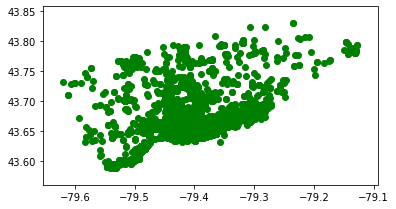

In [227]:

import folium
map_BIA = folium.Map(location=[43.6534817, -79.3839347], zoom_start=10)
TPS.plot(color='green')
                   


In [5]:
map_TPS = folium.Map(location=[43.6534817, -79.3839347], zoom_start=10)

# add markers to map
for Lat, Long, Neighbourhood , in zip(TPS['Lat'], TPS['Long'], TPS['Neighbourhood']):
    label = '{}'.format(Neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [Lat, Long],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_TPS)  
    
map_TPS